# Diabetes Prediction Project
#### Overview
In this project, a balanced dataset comprising 70,692 rows and 21 features was used to classify instances into two classes: 0 for no diabetes and 1 for prediabetes/diabetes. The primary objective was to build an accurate model to predict diabetes status based on various health indicators. Several machine learning models were tested, including logistic regression, random forest, XGBoost, and gradient boosting. Additionally, feature engineering and hyperparameter tuning were employed to optimize model performance, particularly for XGBoost and random forest.

#### Models Tested
1. **Logistic Regression**:
   - Logistic regression served as a baseline model, offering insights into the linear relationships between features and the target variable. Despite its simplicity, it provided a reasonable accuracy but was not as robust as the more complex models.

2. **Random Forest**:
   - Random forest, an ensemble learning method, was utilized to capture complex interactions between features. Despite extensive hyperparameter tuning, the model's performance plateaued, achieving a precision of 0.72 and a recall of 0.79 for the positive class (diabetes).

3. **XGBoost**:
   - XGBoost, known for its high performance and flexibility, was subjected to hyperparameter tuning to optimize its predictive power. The model achieved a precision of 0.73 and a recall of 0.80 for the positive class. Although it slightly outperformed random forest, the improvement was marginal.

4. **Gradient Boosting**:
   - Gradient boosting was also tested but did not show significant improvements over XGBoost and random forest.

#### Feature Engineering and Hyperparameter Tuning
Feature engineering involved creating new features and selecting the most important ones to enhance model performance. Despite these efforts, along with comprehensive hyperparameter tuning, the overall improvement in model performance was modest. The feature selection process revealed that not all 21 features were equally important, and focusing on the top features provided only slight enhancements.

#### Evaluation Metrics
The models were evaluated using precision, recall, f1-score, and accuracy. The confusion matrices for the best-performing models (XGBoost and random forest) indicated a balanced performance between sensitivity (recall) and specificity. However, a notable observation was the consistent trade-off between precision and recall, highlighting the challenge of achieving high performance across all metrics simultaneously.

#### Discussion of Results
The results indicate that while advanced models like XGBoost and random forest can capture complex patterns in the data, the gains over simpler models like logistic regression are not always substantial. The slight improvements achieved through hyperparameter tuning suggest that the current features and data may have inherent limitations in predicting diabetes status more accurately.

The balanced dataset helped in mitigating the effects of class imbalance, ensuring that the models did not favor the majority class. However, the intrinsic difficulty of predicting diabetes based on the available health indicators remains a challenge, as evidenced by the performance metrics.

#### Conclusion
In conclusion, the project successfully explored various machine learning models and techniques to predict diabetes status. While XGBoost and random forest emerged as the top performers, the improvements over logistic regression were incremental. Feature engineering and hyperparameter tuning contributed to optimizing the models but did not lead to substantial performance leaps. 

Future work could involve exploring more advanced techniques such as neural networks, incorporating additional data sources, or applying more sophisticated feature engineering methods. Additionally, further analysis into the most influential features can provide deeper insights into the underlying factors affecting diabetes prediction. 

The project highlights the complexity of medical data prediction and underscores the need for continuous refinement and exploration of new methodologies to enhance predictive accuracy.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
import xgboost as xgb
import numpy as np

## 1. Exploratory Data Analysis

In [2]:
df = pd.read_csv('dataset/diabetes_dataset.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64


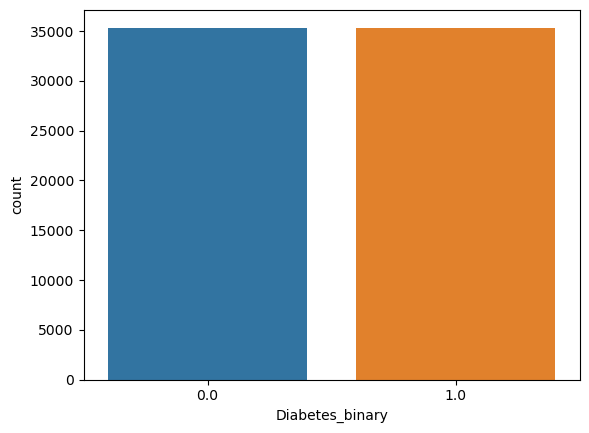

In [5]:
'''
Labels description:
- 0.0 no diabetes
- 1.0 prediabetes / diabetes
'''

print(df['Diabetes_binary'].value_counts())
sns.countplot(x='Diabetes_binary', data=df)
plt.show()

## 2. Data Preprocessing

In [6]:
# Separate df in features and labels
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [7]:
'''
Data preprocessing steps to avoid data leakage:
1. Split the data in train and test.
2. Apply scaling.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Model Building and Preliminary Evaluation

We will test several classification models to choose two that we will further tune.

Training Logistic Regression...
Results for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



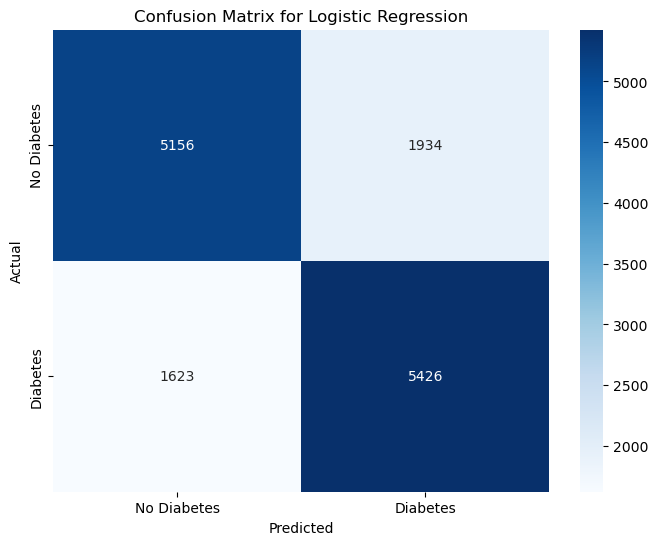

Training Random Forest...
Results for Random Forest:
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



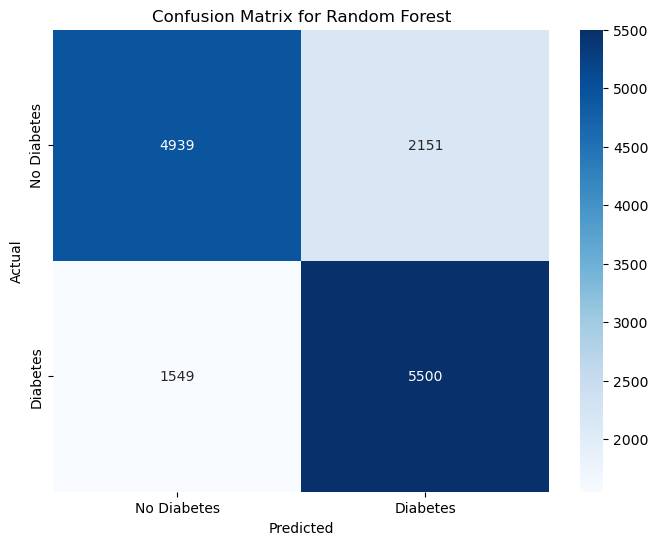

Training Gradient Boosting...
Results for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



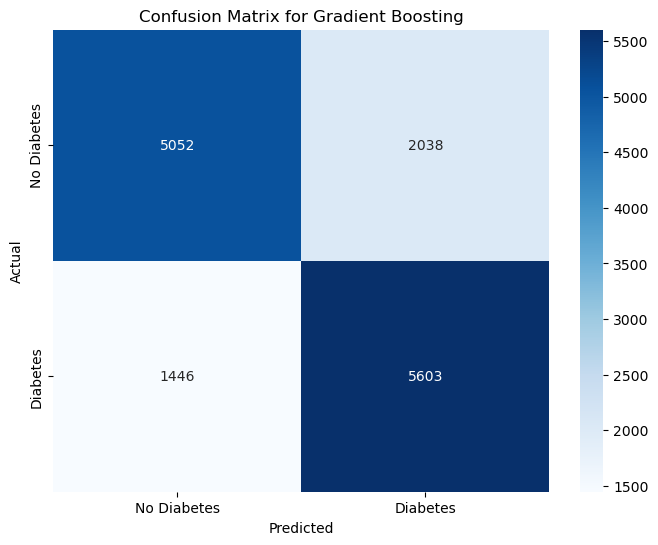

Training XGBoost...
Results for XGBoost:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



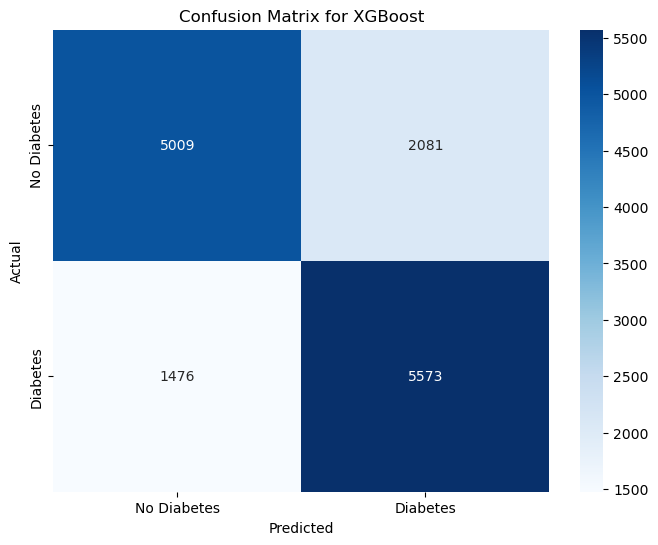

In [8]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

## 5 Model Improvement

We choose Random Forest and XGBoost to further tune them.

### 5.1 XGBoost

In [11]:
# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Setup RFE
rfe = RFE(estimator=xgb_model, n_features_to_select=10, step=1)

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features: ", selected_features)

Selected features:  Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')


In [12]:
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.80      0.77      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



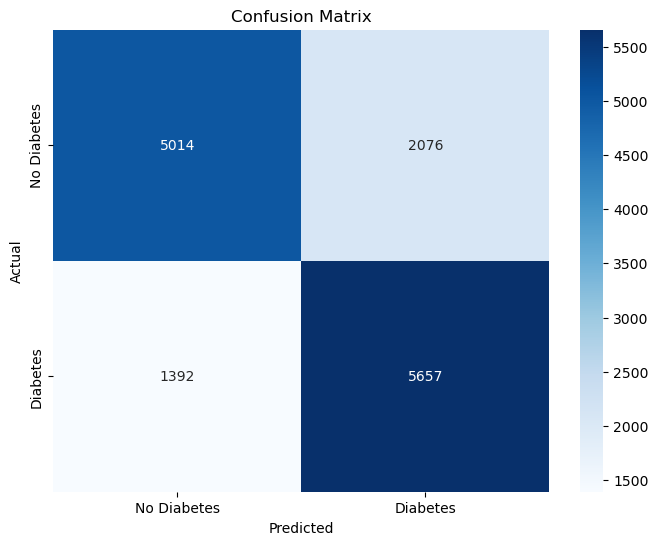

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [13]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_xgb_model.predict(X_test_selected)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Review the best parameters
print("Best parameters found: ", grid_search.best_params_)


### 5.2 Random Forest

In [14]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train_scaled.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Select top 10 features based on importance
top_features = indices[:10]
X_train_top = X_train_scaled[:, top_features]
X_test_top = X_test_scaled[:, top_features]

Feature ranking:
1. Feature BMI (0.1696633740170926)
2. Feature Age (0.12693564221627746)
3. Feature GenHlth (0.10705623848305994)
4. Feature Income (0.08433757588204671)
5. Feature HighBP (0.074709642670555)
6. Feature PhysHlth (0.06829062398210324)
7. Feature Education (0.05836357076150936)
8. Feature MentHlth (0.05219262271823131)
9. Feature HighChol (0.040868001878044895)
10. Feature Smoker (0.028710557116182214)
11. Feature Fruits (0.027796487908826037)
12. Feature Sex (0.026418813902415354)
13. Feature DiffWalk (0.02569327294184101)
14. Feature PhysActivity (0.02352688335617189)
15. Feature Veggies (0.021677532764421355)
16. Feature HeartDiseaseorAttack (0.018625537831361567)
17. Feature NoDocbcCost (0.012022397394867853)
18. Feature Stroke (0.009818832473872063)
19. Feature HvyAlcoholConsump (0.009637712729844048)
20. Feature AnyHealthcare (0.0076471812746775865)
21. Feature CholCheck (0.00600749769659866)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7090
         1.0       0.72      0.79      0.76      7049

    accuracy                           0.74     14139
   macro avg       0.75      0.75      0.74     14139
weighted avg       0.75      0.74      0.74     14139



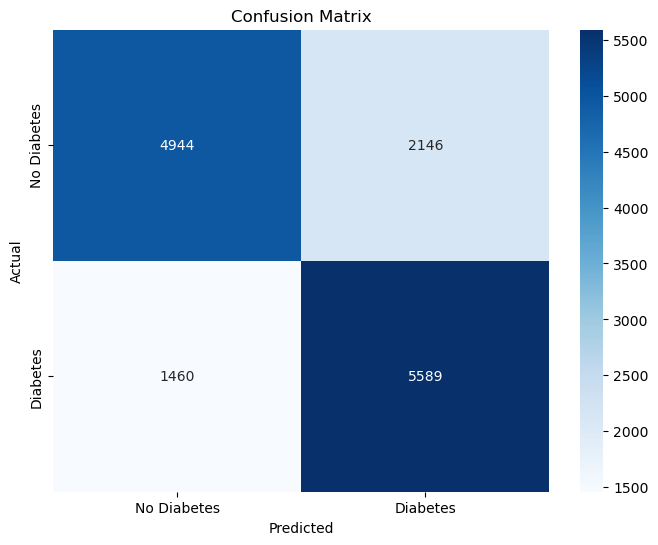

Best parameters found:  {'bootstrap': True, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [15]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Perform hyperparameter tuning with top features
grid_search.fit(X_train_top, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf_model.predict(X_test_top)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)